#  Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [48]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import tensorflow as tf

In [3]:
df= pd.read_csv('netflix_reviews.csv')

In [4]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,4d0a0da5-d737-4f3c-ac6b-0b6e6201a09d,Yopong S.S Konyak,"One of the best thing about Netflix is, it con...",2,2282,8.104.0 build 5 50619,3/1/2024 19:06,8.104.0 build 5 50619
1,de248614-9ef7-48e3-891c-d531ee601d8a,Shrawani Deshpande,Netflix has been my go-to app/site for movies ...,4,356,8.104.0 build 5 50619,3/24/2024 11:20,8.104.0 build 5 50619
2,211f64bc-2fff-4657-b15e-106298991d1b,Jenny D,Has always been the most stable streaming app ...,1,30,8.105.0 build 15 50626,3/17/2024 14:59,8.105.0 build 15 50626
3,3e7ce581-53e1-43dd-ba71-a98d045aa971,Gary Finley,"A new year, and a new price increase. Netflix ...",1,978,8.104.0 build 5 50619,2/24/2024 9:46,8.104.0 build 5 50619
4,2e656c6b-b9b9-4e9c-9817-56b88fd2fa25,Kulek,Great that I can watch movies and shows. I got...,2,710,8.108.0 build 2 50642,3/28/2024 22:08,8.108.0 build 2 50642


In [5]:
df.shape

(8043, 8)

In [6]:
df.drop(columns = ['reviewId','userName','reviewCreatedVersion','at','appVersion'],inplace = True)

In [7]:
df.head()

,content,score,thumbsUpCount
0,"One of the best thing about Netflix is, it con...",2,2282
1,Netflix has been my go-to app/site for movies ...,4,356
2,Has always been the most stable streaming app ...,1,30
3,"A new year, and a new price increase. Netflix ...",1,978
4,Great that I can watch movies and shows. I got...,2,710


#   Data PreProcessing

In [8]:
# compile a regular expression pattern to match emojis
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
    "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags
    "\U00002500-\U00002BEF"  # Chinese characters and other symbols
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"  # Enclosed characters
    "\U0001f926-\U0001f937"  # Additional emoticons
    "\U00010000-\U0010ffff"  # Supplementary Private Use Area
    "\u2640-\u2642"          # Gender symbols
    "\u2600-\u2B55"          # Miscellaneous symbols
    "\u200d"                 # Zero-width joiner
    "\u23cf"                 # Eject button
    "\u23e9"                 # Fast-forward button
    "\u231a"                 # Watch
    "\ufe0f"                 # Variation selectors
    "\u3030"                 # Wavy dash
    "]+", flags=re.UNICODE
)

In [9]:
def preprocess(text):
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text) # removes any HTML between < and >
    text = re.sub(r'[^\w\s]', '', text) # removes all punctuation character.
    text = re.sub(r'\d+', '', text) # removes number
    text = emoji_pattern.sub(r'', text) # removes any characters that match the compiled emoji pattern
    return text

In [10]:
df['cleaned_content'] = df['content'].astype(str).apply(preprocess)
df.head()

,content,score,thumbsUpCount,cleaned_content
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...


In [11]:
# A function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

df['word_tokens'] = df['cleaned_content'].apply(tokenize_text)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is..."
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m..."
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami..."
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n..."
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show..."


In [12]:
# Sentence Tokenization
def tokenize_sent(text):
    return sent_tokenize(text)
df['sent_tokens'] = df['cleaned_content'].apply(tokenize_sent)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...


In [13]:
# list of English stopwords
stop_words = set(stopwords.words('english'))
# function to remove stopwords from a list of tokens
def remove_stopwords(text):
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text
df['cleaned_tokens'] = df['word_tokens'].apply(remove_stopwords)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens,cleaned_tokens
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...,"[one, best, thing, netflix, consumes, less, da..."
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...,"[netflix, goto, appsite, movies, sitcoms, inte..."
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...,"[always, stable, streaming, app, ive, used, su..."
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...,"[new, year, new, price, increase, netflix, ave..."
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...,"[great, watch, movies, shows, got, package, ad..."


In [14]:
# Initialize the stemmer
stemmer = PorterStemmer()
# function to stem text
def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
df['stemmed_content'] = df['cleaned_tokens'].apply(stem_text)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens,cleaned_tokens,stemmed_content
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...,"[one, best, thing, netflix, consumes, less, da...",one best thing netflix consum less data play v...
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...,"[netflix, goto, appsite, movies, sitcoms, inte...",netflix goto appsit movi sitcom interfac phone...
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...,"[always, stable, streaming, app, ive, used, su...",alway stabl stream app ive use subscrib year t...
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...,"[new, year, new, price, increase, netflix, ave...",new year new price increas netflix averag extr...
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...,"[great, watch, movies, shows, got, package, ad...",great watch movi show got packag ad dont mind ...


In [15]:
# Intialize the lemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return ' '.join(lemmatized_tokens)
df['lemmatized_content'] = df['cleaned_tokens'].apply(lemmatize_text)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens,cleaned_tokens,stemmed_content,lemmatized_content
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...,"[one, best, thing, netflix, consumes, less, da...",one best thing netflix consum less data play v...,one best thing netflix consume less data play ...
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...,"[netflix, goto, appsite, movies, sitcoms, inte...",netflix goto appsit movi sitcom interfac phone...,netflix goto appsite movies sitcoms interface ...
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...,"[always, stable, streaming, app, ive, used, su...",alway stabl stream app ive use subscrib year t...,always stable stream app ive use subscriber ye...
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...,"[new, year, new, price, increase, netflix, ave...",new year new price increas netflix averag extr...,new year new price increase netflix average ex...
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...,"[great, watch, movies, shows, got, package, ad...",great watch movi show got packag ad dont mind ...,great watch movies show get package ads dont m...


In [16]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply function 
df['sentiment'] = df['cleaned_content'].apply(get_sentiment)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens,cleaned_tokens,stemmed_content,lemmatized_content,sentiment
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...,"[one, best, thing, netflix, consumes, less, da...",one best thing netflix consum less data play v...,one best thing netflix consume less data play ...,positive
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...,"[netflix, goto, appsite, movies, sitcoms, inte...",netflix goto appsit movi sitcom interfac phone...,netflix goto appsite movies sitcoms interface ...,negative
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...,"[always, stable, streaming, app, ive, used, su...",alway stabl stream app ive use subscrib year t...,always stable stream app ive use subscriber ye...,negative
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...,"[new, year, new, price, increase, netflix, ave...",new year new price increas netflix averag extr...,new year new price increase netflix average ex...,negative
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...,"[great, watch, movies, shows, got, package, ad...",great watch movi show got packag ad dont mind ...,great watch movies show get package ads dont m...,positive


# Visulaization

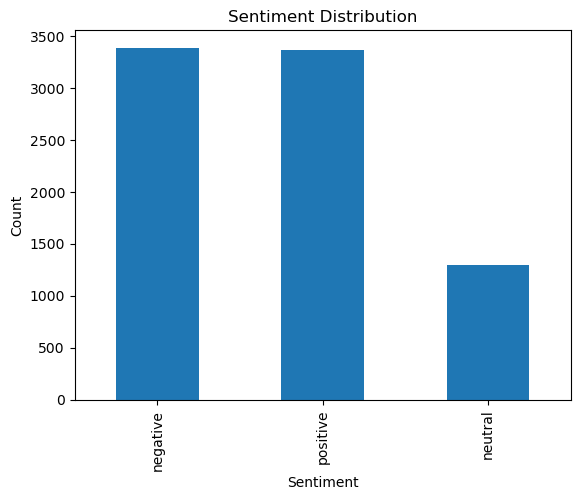

In [17]:
# Visulaization  Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()
# Plot the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

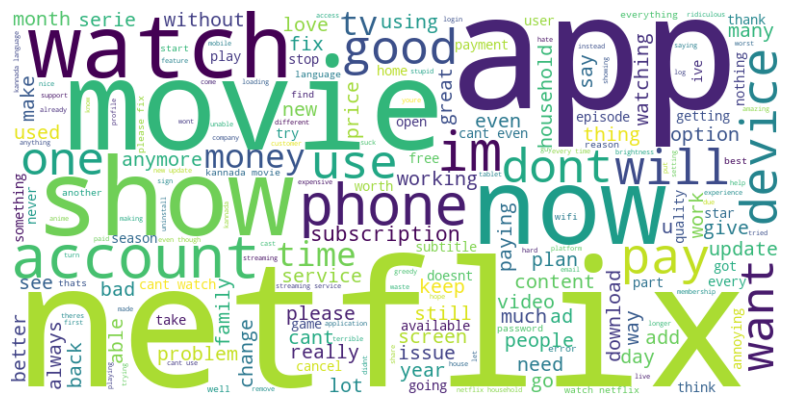

In [18]:
# Visulaize using word cloud
text = ' '.join(df['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

# Feature extraction (representation)

In [19]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_bow = vectorizer.fit_transform(df['cleaned_content'])

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()

,__,aa,aaa,aaj,aand,aang,aap,aapke,aaps,aata,...,ಯವ,ವನನ,ವಬಗ,ವರಗಕಕಗ,ವರಧ,ಸನಮ,ಸನಮಗಳಗ,ಸರಗನನಡ,ಹದ,ᵁᴹᴹ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_content'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,__,aa,aaa,aaj,aand,aang,aap,aapke,aaps,aata,...,ಯವ,ವನನ,ವಬಗ,ವರಗಕಕಗ,ವರಧ,ಸನಮ,ಸನಮಗಳಗ,ಸರಗನನಡ,ಹದ,ᵁᴹᴹ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Initialize and train the CBOW model
cbow_model = Word2Vec(sentences=df['cleaned_tokens'], vector_size=50, window=5, min_count=1, sg=0)
# Extract word vectors and convert to DataFrame
word_vectors = cbow_model.wv

# Create a DataFrame for the word vectors
vector_df = pd.DataFrame(word_vectors.vectors, index=word_vectors.key_to_index.keys())
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
netflix,0.356373,-0.159311,-0.422045,0.009708,-0.056780,-1.459464,1.379471,1.477253,-1.539080,-0.719170,...,1.699464,0.077788,-0.406163,0.082448,1.955447,0.021582,0.071700,-0.714621,0.811977,0.157057
app,0.473645,0.068511,-0.180487,-0.000779,0.337925,-1.163247,1.155910,1.511516,-1.466652,-0.478579,...,1.922244,-0.214744,-0.561754,-0.041086,1.611940,-0.009117,-0.402514,-0.870703,0.670579,0.256070
watch,0.327695,-0.298598,-0.313169,-0.115225,0.158510,-1.199491,0.976441,1.655939,-1.361728,-0.696421,...,1.696470,-0.240132,-0.666006,0.048731,1.528680,0.204773,0.013394,-0.670994,0.563303,0.027321
movies,0.872433,0.015037,0.029264,0.391280,0.247207,-0.461056,0.464262,2.497832,-1.396191,-0.442410,...,2.534110,-0.477931,-0.838006,-0.255808,0.990176,-0.220376,-0.965831,-0.854828,0.267888,0.719475
cant,0.159701,-0.318374,-0.580220,-0.304724,0.071165,-1.523672,1.456532,1.057142,-1.529766,-0.672332,...,1.216113,0.101174,-0.353739,0.251652,2.037210,0.216202,0.432122,-0.557609,0.855913,-0.173053


In [22]:
# Initialize and train the Skip-gram model
skipgram_model = Word2Vec(sentences=df['cleaned_tokens'], vector_size=50, window=5, min_count=1, sg=1)

word_vectors= skipgram_model.wv
vector_df=pd.DataFrame(word_vectors.vectors, index=word_vectors.key_to_index.keys())
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
netflix,0.078349,0.217128,-0.042276,0.041655,-0.250826,-0.563596,0.658111,0.505033,-0.735299,-0.425960,...,0.761589,0.193823,0.202307,0.124222,0.357901,-0.090749,-0.011913,-0.145437,0.374977,0.102823
app,0.085232,0.440986,-0.205449,-0.145552,0.202219,-0.775965,0.897156,0.394924,-0.815823,-0.235325,...,0.934722,0.429440,0.130169,-0.131937,0.589990,0.039936,-0.367850,-0.154251,0.474125,0.025743
watch,-0.159505,0.127481,-0.100215,-0.282551,0.069610,-0.920164,0.358264,1.067852,-0.747985,-0.515502,...,0.575736,-0.090265,-0.209983,-0.136295,0.212559,0.294371,0.296364,-0.223984,0.343975,-0.064379
movies,0.388626,-0.039370,0.087404,0.345958,0.081187,-0.096397,0.324599,1.440231,-0.600817,-0.259078,...,0.916976,0.054700,-0.097140,-0.169420,0.361793,0.205313,-0.366854,-0.028622,0.172498,0.220120
cant,-0.092777,0.114291,-0.089359,-0.256681,0.626645,-0.849845,0.758333,0.558166,-0.728442,-0.353220,...,0.254812,0.137001,-0.311011,0.481920,0.863608,0.200582,-0.064279,0.167500,0.260775,-0.140723


In [23]:
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens,cleaned_tokens,stemmed_content,lemmatized_content,sentiment
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...,"[one, best, thing, netflix, consumes, less, da...",one best thing netflix consum less data play v...,one best thing netflix consume less data play ...,positive
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...,"[netflix, goto, appsite, movies, sitcoms, inte...",netflix goto appsit movi sitcom interfac phone...,netflix goto appsite movies sitcoms interface ...,negative
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...,"[always, stable, streaming, app, ive, used, su...",alway stabl stream app ive use subscrib year t...,always stable stream app ive use subscriber ye...,negative
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...,"[new, year, new, price, increase, netflix, ave...",new year new price increas netflix averag extr...,new year new price increase netflix average ex...,negative
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...,"[great, watch, movies, shows, got, package, ad...",great watch movi show got packag ad dont mind ...,great watch movies show get package ads dont m...,positive


In [24]:
# Convert sentiments to numerical labels
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label_encoded'] = df['sentiment'].map(sentiment_label_map)
df.head()

,content,score,thumbsUpCount,cleaned_content,word_tokens,sent_tokens,cleaned_tokens,stemmed_content,lemmatized_content,sentiment,label_encoded
0,"One of the best thing about Netflix is, it con...",2,2282,one of the best thing about netflix is it cons...,"[one, of, the, best, thing, about, netflix, is...",[one of the best thing about netflix is it con...,"[one, best, thing, netflix, consumes, less, da...",one best thing netflix consum less data play v...,one best thing netflix consume less data play ...,positive,2
1,Netflix has been my go-to app/site for movies ...,4,356,netflix has been my goto appsite for movies an...,"[netflix, has, been, my, goto, appsite, for, m...",[netflix has been my goto appsite for movies a...,"[netflix, goto, appsite, movies, sitcoms, inte...",netflix goto appsit movi sitcom interfac phone...,netflix goto appsite movies sitcoms interface ...,negative,0
2,Has always been the most stable streaming app ...,1,30,has always been the most stable streaming app ...,"[has, always, been, the, most, stable, streami...",[has always been the most stable streaming app...,"[always, stable, streaming, app, ive, used, su...",alway stabl stream app ive use subscrib year t...,always stable stream app ive use subscriber ye...,negative,0
3,"A new year, and a new price increase. Netflix ...",1,978,a new year and a new price increase netflix av...,"[a, new, year, and, a, new, price, increase, n...",[a new year and a new price increase netflix a...,"[new, year, new, price, increase, netflix, ave...",new year new price increas netflix averag extr...,new year new price increase netflix average ex...,negative,0
4,Great that I can watch movies and shows. I got...,2,710,great that i can watch movies and shows i got ...,"[great, that, i, can, watch, movies, and, show...",[great that i can watch movies and shows i got...,"[great, watch, movies, shows, got, package, ad...",great watch movi show got packag ad dont mind ...,great watch movies show get package ads dont m...,positive,2


# Machine learning models

In [31]:
X = df['cleaned_content']
y = df['label_encoded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [32]:
# Define a pipeline for SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('clf', SVC())])


In [33]:
# Train the SVM model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [34]:
# Predict on the test set
y_pred_svm = svm_pipeline.predict(X_test)
# Evaluate the SVM model
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Model Performance:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       694
           1       0.87      0.39      0.53       254
           2       0.77      0.75      0.76       661

    accuracy                           0.72      1609
   macro avg       0.77      0.65      0.68      1609
weighted avg       0.74      0.72      0.72      1609



In [36]:
# Define a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('clf', RandomForestClassifier())  # Random Forest classifier
])

In [37]:
# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [38]:
# Predict on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       694
           1       0.74      0.46      0.56       254
           2       0.74      0.71      0.72       661

    accuracy                           0.70      1609
   macro avg       0.72      0.65      0.67      1609
weighted avg       0.71      0.70      0.70      1609



In [40]:
# Generate classification reports
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Create a DataFrame for combined report
combined_report = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score"],
    "SVM": [svm_report['weighted avg']['precision'], svm_report['weighted avg']['recall'], svm_report['weighted avg']['f1-score']],
    "Random Forest": [rf_report['weighted avg']['precision'], rf_report['weighted avg']['recall'], rf_report['weighted avg']['f1-score']]
})

print(combined_report)

      Metric       SVM  Random Forest
0  Precision  0.743412       0.708467
1     Recall  0.724674       0.703543
2   F1-Score  0.715736       0.698743


# Deep Learning Model (RNN, LSTM)

In [42]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input length
max_seq_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

In [43]:
# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [46]:
# RNN model
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_seq_length),
    SimpleRNN(128),
    Dense(3, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_pad, y_test_cat)
print(f'RNN Test Accuracy: {rnn_accuracy}')

Epoch 1/5
161/161 [==============================] - 13s 56ms/step - loss: 1.0019 - accuracy: 0.4609 - val_loss: 0.9813 - val_accuracy: 0.5322
Epoch 2/5
161/161 [==============================] - 10s 64ms/step - loss: 0.6070 - accuracy: 0.7735 - val_loss: 0.9231 - val_accuracy: 0.5758
Epoch 3/5
161/161 [==============================] - 9s 57ms/step - loss: 0.1958 - accuracy: 0.9446 - val_loss: 1.0715 - val_accuracy: 0.6208
Epoch 4/5
161/161 [==============================] - 9s 54ms/step - loss: 0.0569 - accuracy: 0.9893 - val_loss: 1.3257 - val_accuracy: 0.5781
Epoch 5/5
51/51 [==============================] - 1s 14ms/step - loss: 1.4523 - accuracy: 0.6072
RNN Test Accuracy: 0.6072094440460205


In [47]:
# Bidirectional LSTM model
bi_lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_seq_length),
    Bidirectional(LSTM(128)),
    Dense(3, activation='softmax')
])

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
bi_lstm_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
bi_lstm_loss, bi_lstm_accuracy = bi_lstm_model.evaluate(X_test_pad, y_test_cat)
print(f'Bidirectional LSTM Test Accuracy: {bi_lstm_accuracy}')

Epoch 1/5
161/161 [==============================] - 45s 249ms/step - loss: 0.9078 - accuracy: 0.5440 - val_loss: 0.7384 - val_accuracy: 0.6962
Epoch 2/5
161/161 [==============================] - 45s 281ms/step - loss: 0.5202 - accuracy: 0.7999 - val_loss: 0.6588 - val_accuracy: 0.7490
Epoch 3/5
161/161 [==============================] - 39s 245ms/step - loss: 0.3143 - accuracy: 0.8887 - val_loss: 0.7422 - val_accuracy: 0.7280
Epoch 4/5
161/161 [==============================] - 41s 253ms/step - loss: 0.2136 - accuracy: 0.9281 - val_loss: 0.7918 - val_accuracy: 0.7560
Epoch 5/5
51/51 [==============================] - 3s 66ms/step - loss: 0.8521 - accuracy: 0.7526
Bidirectional LSTM Test Accuracy: 0.7526413798332214


# Pre-trained model (BERT)

In [49]:
# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize the input text
def tokenize_text(text):
    return tokenizer(text, padding='max_length', max_length=128, truncation=True, return_tensors='tf')

# Prepare the dataset
train_encodings = tokenize_text(X_train.tolist())
test_encodings = tokenize_text(X_test.tolist())

# Convert labels to tensors
train_labels = tf.convert_to_tensor(y_train.values)
test_labels = tf.convert_to_tensor(y_test.values)


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

C:\Users\Pc\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Pc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-5),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[SparseCategoricalAccuracy()])

# Train the model
model.fit(train_encodings['input_ids'], train_labels, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(test_encodings['input_ids'], test_labels)
print(f'BERT Test Accuracy: {accuracy}')

Epoch 1/3
117/322 [=========>....................] - ETA: 55:58 - loss: 1.0387 - sparse_categorical_accuracy: 0.4172